In [1]:
# Comparison between the Stochastic gradient descent and Batch gradient descent (normal gradient descent)

import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
def generate_data(num_samples):
    np.random.seed(42)
    X = np.random.rand(num_samples , 1) * 10    # features
    y = 3 * X + 7 + np.random.randn(num_samples , 1)   # target with some noise
    return X , y

In [3]:
def compute_loss(y_true , y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [4]:
def batch_gradient_descent(X , y , epochs , lr = 0.01):
    m , n  = X.shape
    X = np.c_[np.ones((m , 1)) , X]  # add bias term
    theta = np.random.randn(n + 1 , 1)
    losses = []


    for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2 / m * X.T.dot(errors)
        theta -= lr * gradients
        loss = compute_loss(y , predictions)
        losses.append(loss)

    return theta , losses



Batch Gradient Descent (Small Dataset): Time = 0.0022s , Final Loss = 9.4474
Batch Gradient Descent (Large Dataset): Time = 8.6977s , Final Loss = 7.6046
Stochastic Gradient Descent (Small Dataset): Time = 0.0021s , Final Loss = 4.0660
Stochastic Gradient Descent (Large Dataset): Time = 0.0964s , Final Loss = 28.4700


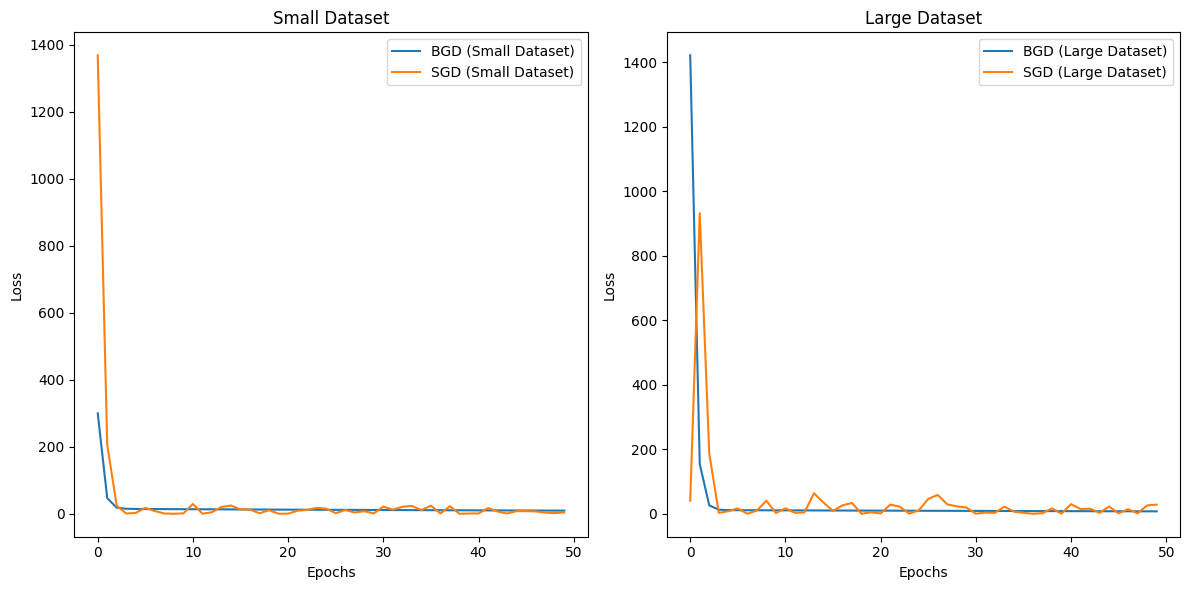

In [6]:
def stochastic_gradient_descent(X , y , epochs , lr = 0.01):
    m , n = X.shape
    X = np.c_[np.ones((m , n)) , X]    # add bias term
    theta = np.random.randn(n+1 , 1)
    losses = []



    for epoch in range(epochs):
        random_index = np.random.randint(m)
        xi = X[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        predictions = xi.dot(theta)
        errors = predictions - yi
        gradients = 2 * xi.T.dot(errors)
        theta -= lr * gradients
        epoch_loss = compute_loss(yi , predictions)
        losses.append(epoch_loss)

    return theta , losses


small_dataset_size = 1000
large_dataset_size = 10000000


X_small , y_small = generate_data(small_dataset_size)
X_large , y_large = generate_data(large_dataset_size)




# for small dataset , comparing time taken between the bgd and sgd

start_time = time.time()
theta_bgd_small , losses_bgd_small = batch_gradient_descent(X_small , y_small , epochs = 50)
time_bgd_small = time.time() - start_time



#for large dataset

start_time = time.time()
theta_bgd_large , losses_bgd_large = batch_gradient_descent(X_large , y_large , epochs = 50)
time_bgd_large = time.time() - start_time


# for small dataset

start_time = time.time()
theta_sgd_small , losses_sgd_small = stochastic_gradient_descent(X_small , y_small , epochs = 50)
time_sgd_small = time.time() - start_time

# for large dataset

start_time = time.time()
theta_sgd_large , losses_sgd_large = stochastic_gradient_descent(X_large , y_large , epochs = 50)
time_sgd_large = time.time() - start_time


# printing all the values
# for bgd small and large dataset

print("Batch Gradient Descent (Small Dataset): Time = {:.4f}s , Final Loss = {:.4f}".format(time_bgd_small , losses_bgd_small[-1]))

print("Batch Gradient Descent (Large Dataset): Time = {:.4f}s , Final Loss = {:.4f}".format(time_bgd_large , losses_bgd_large[-1]))

# for sgd small and large dataset

print("Stochastic Gradient Descent (Small Dataset): Time = {:.4f}s , Final Loss = {:.4f}".format(time_sgd_small , losses_sgd_small[-1]))

print("Stochastic Gradient Descent (Large Dataset): Time = {:.4f}s , Final Loss = {:.4f}".format(time_sgd_large , losses_sgd_large[-1]))


plt.figure(figsize=(12 , 6))
plt.subplot(1 , 2 , 1)
plt.plot(losses_bgd_small , label = "BGD (Small Dataset)")
plt.plot(losses_sgd_small , label = "SGD (Small Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Small Dataset")




plt.subplot(1 , 2 , 2)
plt.plot(losses_bgd_large , label = "BGD (Large Dataset)")
plt.plot(losses_sgd_large , label= "SGD (Large Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Large Dataset")
plt.tight_layout()
plt.show()


